**Task C**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
N = 16
F = np.zeros((N,N),dtype=complex)


for m in range(N):
    for n in range(N):
        F[m][n] = (1 / np.sqrt(N)) * np.exp(-1j * 2 * np.pi * m * n / N)

R = np.random.randn(N,N)

**Task C** - a)

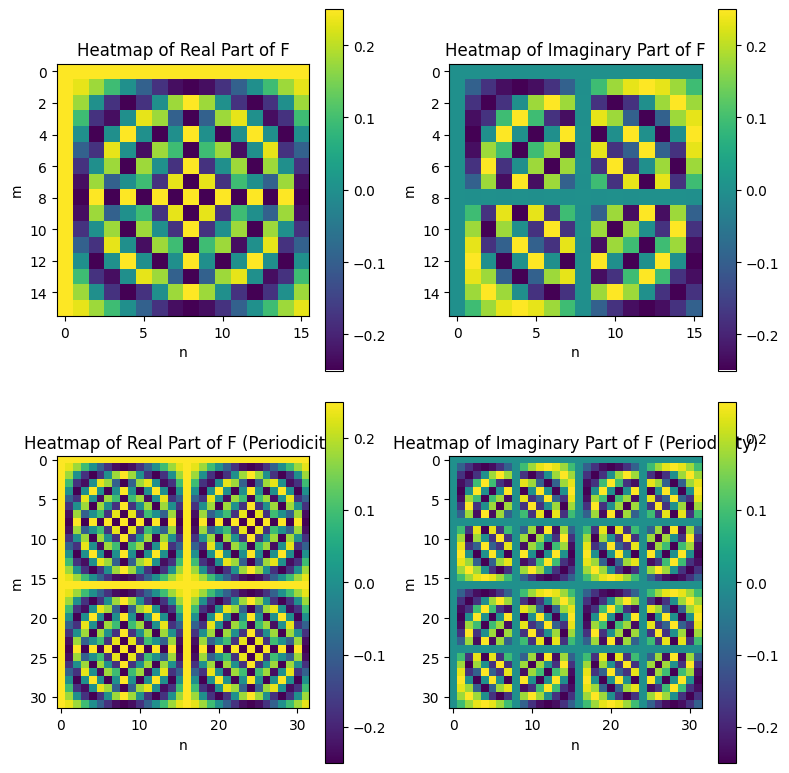

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Heatmap of Real Part
im0 = axs[0, 0].imshow(F.real, cmap="viridis")
axs[0, 0].set_title("Heatmap of Real Part of F")
axs[0, 0].set_xlabel("n")
axs[0, 0].set_ylabel("m")
fig.colorbar(im0, ax=axs[0, 0])

# Heatmap of Imag Part
im1 = axs[0, 1].imshow(F.imag, cmap="viridis")
axs[0, 1].set_title("Heatmap of Imaginary Part of F")
axs[0, 1].set_xlabel("n")
axs[0, 1].set_ylabel("m")
fig.colorbar(im1, ax=axs[0, 1])

# Construct repeated F for periodicity
F_repeat = np.zeros((2*N, 2*N), dtype=complex)
for m in range(2*N):
    for n in range(2*N):
        F_repeat[m, n] = (1 / np.sqrt(N)) * np.exp(-1j * 2 * np.pi * m * n / N)

# Heatmap Real (Periodicity)
im2 = axs[1, 0].imshow(F_repeat.real, cmap="viridis")
axs[1, 0].set_title("Heatmap of Real Part of F (Periodicity)")
axs[1, 0].set_xlabel("n")
axs[1, 0].set_ylabel("m")
fig.colorbar(im2, ax=axs[1, 0])

# Heatmap Imag (Periodicity)
im3 = axs[1, 1].imshow(F_repeat.imag, cmap="viridis")
axs[1, 1].set_title("Heatmap of Imaginary Part of F (Periodicity)")
axs[1, 1].set_xlabel("n")
axs[1, 1].set_ylabel("m")
fig.colorbar(im3, ax=axs[1, 1])

plt.tight_layout()
plt.show()


- The Discrete Fourier Transform matrix is a symmetric matrix as we can see from the plot , because F[i][j] = F[j][i]. Therefore the matrices containing real parts of F and the matrix containing imaginary parts of F is also a symmetric matrix.
$$
F_{m,n} = F_{n,m}
$$
$$
\frac{1}{\sqrt{N}} e^{-j \frac{2\pi}{N} m n} = \frac{1}{\sqrt{N}} e^{-j \frac{2\pi}{N} n m}
$$

- The Real part of the Discrete Fourier Transform matrix F is 2 fold symmetric (across both vertical and horizontal axes) because Cosine is even function. This heatmap is also diagonally symmetric across the two diagonals.
$$
  \cos(-x) = \cos(x)
$$
- The Imaginary part of the Discrete Fourier Transform matrix F is not symmetric vertically and horizontally as Sine is an odd function. But this heatmap is diagonally symmetric across the two diagonals.
 $$
  \sin(-x) = -\sin(x)
$$
- Both the cosine (Real) and sine (Imaginary) patterns will repeat both vertically and horizontally after multiples of N as they have a periodicity of N.

**Task C** - b)

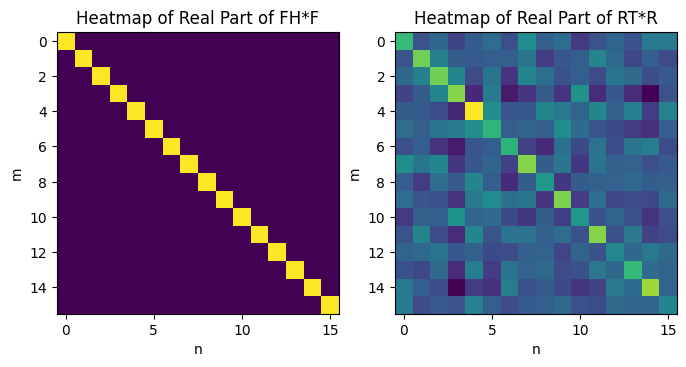

In [4]:
I = F.conj().T @ F

R_RT = R.T @ R

fig, ax = plt.subplots(1, 2, figsize=(8,8))
im0 = ax[0].imshow(I.real, cmap="viridis")
ax[0].set_title("Heatmap of Real Part of FH*F")
ax[0].set_xlabel("n")
ax[0].set_ylabel("m")

im1 = ax[1].imshow(R_RT, cmap="viridis")
ax[1].set_title("Heatmap of Real Part of RT*R")
ax[1].set_xlabel("n")
ax[1].set_ylabel("m")

plt.show()


- **Unitarity of a transformation:**  
  A matrix \(F\) is unitary if
  $$
  F^{*} F = I
  $$

- **Energy Preservation (Parseval’s theorem):**  
  For a discrete signal \(x[n]\) and its DFT \(X[k]\):
  $$
  \sum_{n=0}^{N-1} |x[n]|^2 = \sum_{k=0}^{N-1} |X[k]|^2
  $$
  The total energy remains unchanged; it is redistributed among frequency components.

- Columns of a unitary matrix are orthonormal, meaning each frequency component is independent and does not interfere with others.

- The inverse DFT perfectly reconstructs the original signal without any loss in information and energy.
  $$
  x[n] = F^{-1} X[k] = F^{*} X[k]
  $$

- In audio, communications, or image processing, unitarity ensures that filtering, compression, or other frequency-domain operations **do not alter the total signal energy**, preventing distortion or artifacts.


**Task C** - c)

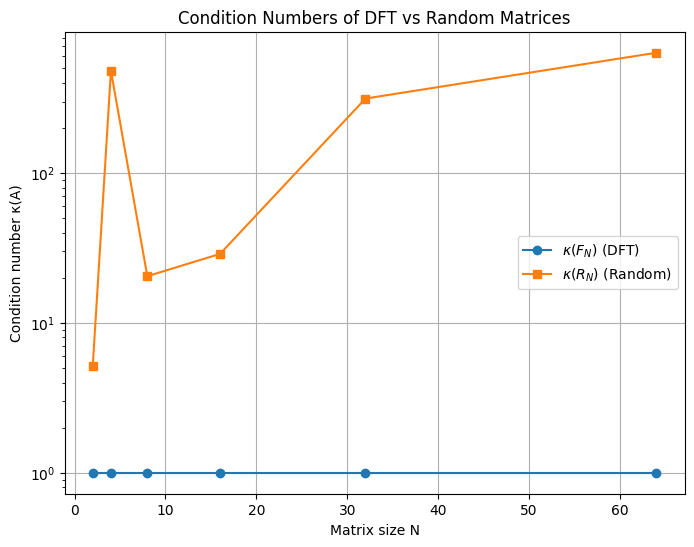

In [ ]:
Ns = [2, 4, 8, 16, 32, 64]
kappa_F = []
kappa_R = []

for i in Ns:
    F_i = np.zeros((i, i), dtype=complex)
    for m in range(i):
        for n in range(i):
            F_i[m][n] = (1/np.sqrt(i)) * np.exp(-1j * 2 * np.pi * m * n / i)
    
    R_i = np.random.randn(i, i)
    
    kappa_F.append(np.linalg.cond(F_i))
    kappa_R.append(np.linalg.cond(R_i))

plt.figure(figsize=(8,6))
plt.plot(Ns, kappa_F, marker="o", label=r"$\kappa(F_N)$ (DFT)")
plt.plot(Ns, kappa_R, marker="s", label=r"$\kappa(R_N)$ (Random)")
plt.xlabel("Matrix size N")
plt.ylabel("Condition number κ(A)")
plt.title("Condition Numbers of DFT vs Random Matrices")
plt.legend()
plt.yscale("log")
plt.grid(True)
plt.show()


- **Why is the DFT always well-conditioned?**  
  The DFT matrix $F_N$ is unitary, meaning $F_N^* F_N = I$.  
  Hence, all its singular values are $1$, which implies  
  $$
  \kappa(F_N) = 1
  $$  
  for all $N$. This ensures perfect numerical stability and energy preservation.

- **Why do random matrices’ condition numbers vary and typically grow with $N$?**  
  For a random Gaussian matrix $R_N$, the singular values are spread out.  
  As $N$ increases, the ratio between the largest and smallest singular values typically grows, so  
  $$
  \kappa(R_N) \gg 1
  $$  
  and increases with $N$. This means random matrices are often ill-conditioned.

- **Implications for numerical stability:**  
  - For $F_N$, solving $F_N x = b$ or applying the DFT is always stable since $\kappa(F_N) = 1$.  
  - For $R_N$, high condition numbers mean that small perturbations in $b$ or round-off errors get amplified in $x$.  
  - In practice, this makes random (ill-conditioned) systems numerically unstable, while unitary transforms like the DFT remain stable.


SyntaxError: invalid syntax (50554116.py, line 1)